In [74]:
import pandas as pd
import datetime
import math
import numpy as np

In [75]:
cs_df = pd.read_excel(io=r'C:\Users\DELL\Desktop\Online Retail.xlsx')

In [78]:
cs_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,days_since_last_purchase_num
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,3.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,4.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5.0


In [79]:
# Transaction size
cs_df.shape

(541909, 9)

In [80]:
cs_df.Country.value_counts().reset_index().head(n=10)

,index,Country
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,2002
8,Portugal,1519
9,Australia,1259


In [81]:
# no of customers
cs_df.CustomerID.unique().shape

(4373,)

In [82]:
(cs_df.CustomerID.value_counts()/sum(cs_df.CustomerID.value_counts())*100).head(n=13).cumsum()

17841.0    1.962249
14911.0    3.413228
14096.0    4.673708
12748.0    5.814728
14606.0    6.498553
15311.0    7.110850
14646.0    7.623350
13089.0    8.079807
13263.0    8.492020
14298.0    8.895138
15039.0    9.265809
14156.0    9.614850
18118.0    9.930462
Name: CustomerID, dtype: float64

In [83]:
cs_df.StockCode.unique().shape

(4070,)

In [84]:
#Description of items: We see that the descriptions are more then the stock code so there must be some stock code which have more than one decription

cs_df.Description.unique().shape

(4224,)

In [85]:
cs_df.dtypes

InvoiceNo                               object
StockCode                               object
Description                             object
Quantity                                 int64
InvoiceDate                     datetime64[ns]
UnitPrice                              float64
CustomerID                             float64
Country                                 object
days_since_last_purchase_num           float64
dtype: object

In [86]:
cat_des_df = cs_df.groupby(["StockCode","Description"]).count().reset_index()

In [87]:
#Stockcode which have more than one description
cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts()>1].reset_index().head()

,index,StockCode
0,20713,8
1,23084,7
2,85175,6
3,21830,6
4,85172,5


In [88]:
cs_df[cs_df['StockCode'] 
      ==cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts()>1].
      reset_index()['index'][6]]['Description'].unique()

array(['PLEASE ONE PERSON METAL SIGN', 'on cargo order', 'adjustment',
       'check', nan, 'dotcom'], dtype=object)

In [89]:
cs_df['invdatetime'] = pd.to_datetime(cs_df.InvoiceDate)

In [90]:
cs_df.Quantity.describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [91]:
cs_df.UnitPrice.describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [92]:
# Seperate data for one geography
cs_df = cs_df[cs_df.Country == 'United Kingdom']
# Seperate attribute for total amount
cs_df['amount'] = cs_df.Quantity*cs_df.UnitPrice
# Remove negative or return transactions
cs_df = cs_df[~(cs_df.amount<0)]
cs_df.head()
cs_df = cs_df[~(cs_df.CustomerID.isnull())]

In [93]:
cs_df.shape

(354345, 11)

In [94]:
cs_df.InvoiceDate.max()

Timestamp('2011-12-09 12:49:00')

In [95]:
cs_df.InvoiceDate.min()

Timestamp('2010-12-01 08:26:00')

In [96]:
refrence_date = cs_df.InvoiceDate.max()
refrence_date = refrence_date + datetime.timedelta(days = 1)

In [97]:
customer_history_df = cs_df.groupby("CustomerID").min().reset_index()[['CustomerID', 'days_since_last_purchase_num']]
customer_history_df.rename(columns={'days_since_last_purchase_num':'recency'}, inplace=True)
customer_history_df.recency.describe()

count    1155.000000
mean        4.998268
std         0.242740
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        11.000000
Name: recency, dtype: float64

In [98]:
customer_history_df.head()

,CustomerID,recency
0,12346.0,5.0
1,12747.0,5.0
2,12748.0,5.0
3,12749.0,NaN
4,12820.0,5.0


In [99]:
customer_history_df.recency.describe()

count    1155.000000
mean        4.998268
std         0.242740
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        11.000000
Name: recency, dtype: float64

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

C:\Users\DELL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\DELL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


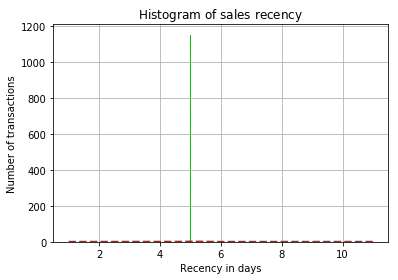

In [101]:
x = customer_history_df.recency
mu = np.mean(customer_history_df.recency)
sigma = math.sqrt(np.var(customer_history_df.recency))
n, bins, patches = plt.hist(x, 1000, facecolor='green', alpha=0.75)
# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)
plt.rcParams["figure.figsize"] = (10,8)
plt.xlabel('Recency in days')
plt.ylabel('Number of transactions')
plt.title(r'$\mathrm{Histogram\ of\ sales\ recency}\ $')
plt.grid(True)
plt.show()

In [102]:
customer_history_df.head()

,CustomerID,recency
0,12346.0,5.0
1,12747.0,5.0
2,12748.0,5.0
3,12749.0,NaN
4,12820.0,5.0


In [77]:
from sklearn import preprocessing
import math
customer_history_df['recency_log'] = customer_history_df['recency'].apply(math.log)
customer_history_df['frequency_log'] = customer_history_df['frequency'].apply(math.log)
customer_history_df['amount_log'] = customer_history_df['amount'].apply(math.log)
feature_vector = ['amount_log', 'recency_log','frequency_log']
X = customer_history_df[feature_vector].as_matrix()
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

KeyError: 'frequency'

In [103]:
plt.scatter(customer_history_df.recency_log, customer_history_df.amount_log,alpha=0.5)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'recency_log'

In [104]:
x = customer_history_df.amount_log
n, bins, patches = plt.hist(x, 1000, facecolor='green', alpha=0.75)
plt.xlabel('Log of Sales Amount')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Log\ transformed\ Customer\ Monetory\ value}\ $')
plt.grid(True)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'amount_log'

In [105]:
customer_history_df.head()

,CustomerID,recency
0,12346.0,5.0
1,12747.0,5.0
2,12748.0,5.0
3,12749.0,NaN
4,12820.0,5.0


AttributeError: 'DataFrame' object has no attribute 'recency_log'

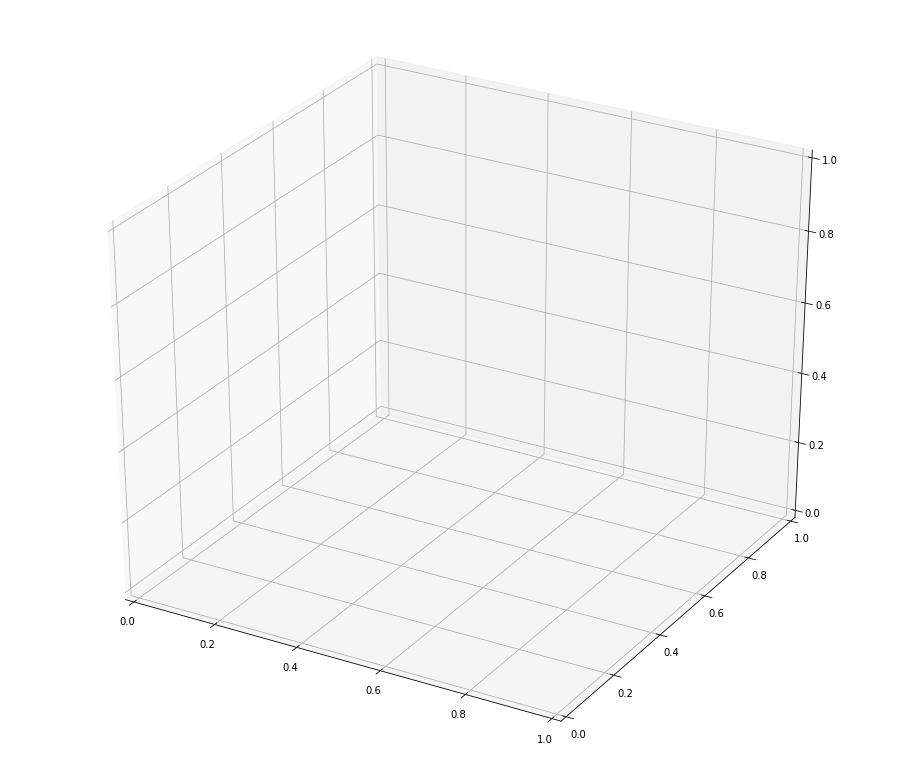

In [106]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
width = 16
height = 14

fig = plt.figure(figsize=(width, height))
ax = fig.add_subplot(111, projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
xs =customer_history_df.recency_log
ys = customer_history_df.frequency_log
zs = customer_history_df.amount_log
ax.scatter(xs, ys, zs)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()


In [107]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X = X_scaled

cluster_centers = dict()

for n_clusters in range(3,6,2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    #ax2 = plt.subplot(111, projection='3d')
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    cluster_centers.update({n_clusters :{
                                        'cluster_center':clusterer.cluster_centers_,
                                       'silhouette_score':silhouette_avg}
                           })

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    feature1 = 0
    feature2 = 2
    ax2.scatter(X[:, feature1], X[:, feature2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, feature1], centers[:, feature2], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[feature1], c[feature2], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature i.e. monetary value")
    ax2.set_ylabel("Feature space for the 2nd feature i.e. frequency")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

NameError: name 'X_scaled' is not defined

In [108]:
for i in range(3,6,2):
    print("for {} number of clusters".format(i))
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=feature_vector))
    print("Silhouette score for cluster {} is {}". format(i, cluster_centers[i]['silhouette_score']))

for 3 number of clusters


NameError: name 'scaler' is not defined

In [112]:
import pandas as pd
import datetime
import math
from Orange.data import Domain, DiscreteVariable, ContinuousVariable
from orangecontrib.associate.fpgrowth import *
import Orange
import numpy as np
from Orange.data import Domain, Table

In [113]:
cs_mba = pd.read_excel(io=r'C:\Users\DELL\Desktop\Online Retail.xlsx')

In [114]:
cs_mba_uk = cs_mba[cs_mba.Country == 'United Kingdom']

In [115]:
cs_mba_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [116]:
cs_mba_uk = cs_mba_uk[~(cs_mba_uk.InvoiceNo.str.contains("C") == True)]

In [117]:
cs_mba_uk = cs_mba_uk[~cs_mba_uk.Quantity<0]

In [118]:
cs_mba_ger = cs_mba[cs_mba.Country == 'Germany']

In [119]:
cs_mba_ger.shape

(9495, 8)

In [120]:
cs_mba_ger = cs_mba_ger[~(cs_mba_ger.InvoiceNo.str.contains("C") == True)]

In [121]:
cs_mba_ger = cs_mba_ger[~cs_mba_ger.Quantity<0]

In [122]:
cs_mba_ger.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01 13:04:00,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-12-01 13:04:00,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-12-01 13:04:00,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,2010-12-01 13:04:00,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,2010-12-01 13:04:00,1.95,12662.0,Germany


In [123]:
cs_mba_ger.InvoiceNo.value_counts().shape

(457,)

In [124]:
for record in cs_mba_ger.head().to_dict('records'):
    print(record)

{'InvoiceNo': 536527, 'StockCode': 22809, 'Description': 'SET OF 6 T-LIGHTS SANTA', 'Quantity': 6, 'InvoiceDate': Timestamp('2010-12-01 13:04:00'), 'UnitPrice': 2.95, 'CustomerID': 12662.0, 'Country': 'Germany'}
{'InvoiceNo': 536527, 'StockCode': 84347, 'Description': 'ROTATING SILVER ANGELS T-LIGHT HLDR', 'Quantity': 6, 'InvoiceDate': Timestamp('2010-12-01 13:04:00'), 'UnitPrice': 2.55, 'CustomerID': 12662.0, 'Country': 'Germany'}
{'InvoiceNo': 536527, 'StockCode': 84945, 'Description': 'MULTI COLOUR SILVER T-LIGHT HOLDER', 'Quantity': 12, 'InvoiceDate': Timestamp('2010-12-01 13:04:00'), 'UnitPrice': 0.85, 'CustomerID': 12662.0, 'Country': 'Germany'}
{'InvoiceNo': 536527, 'StockCode': 22242, 'Description': '5 HOOK HANGER MAGIC TOADSTOOL', 'Quantity': 12, 'InvoiceDate': Timestamp('2010-12-01 13:04:00'), 'UnitPrice': 1.65, 'CustomerID': 12662.0, 'Country': 'Germany'}
{'InvoiceNo': 536527, 'StockCode': 22244, 'Description': '3 HOOK HANGER MAGIC GARDEN', 'Quantity': 12, 'InvoiceDate': Tim

In [125]:
cs_mba_ger.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01 13:04:00,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-12-01 13:04:00,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-12-01 13:04:00,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,2010-12-01 13:04:00,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,2010-12-01 13:04:00,1.95,12662.0,Germany


In [127]:
import csv
import pandas as pd
grocery_items = set()
with open(r"C:\Users\DELL\Desktop\Python Codes\Code_Ch 08\Ch 08_code\grocery_dataset.txt") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        grocery_items.update(line)
output_list = list()
with open(r"C:\Users\DELL\Desktop\Python Codes\Code_Ch 08\Ch 08_code\grocery_dataset.txt") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        row_val = {item:0 for item in grocery_items}
        row_val.update({item:1 for item in line})
        output_list.append(row_val)
grocery_df = pd.DataFrame(output_list)

In [128]:
grocery_df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [129]:
total_item_count = sum(grocery_df.sum())
print(total_item_count)
item_summary_df = grocery_df.sum().sort_values(ascending = False).reset_index().head(n=20)
item_summary_df.rename(columns={item_summary_df.columns[0]:'item_name',item_summary_df.columns[1]:'item_count'}, inplace=True)
item_summary_df.head()

43367


,item_name,item_count
0,whole milk,2513
1,other vegetables,1903
2,rolls/buns,1809
3,soda,1715
4,yogurt,1372


In [130]:
item_summary_df['item_perc'] = item_summary_df['item_count']/total_item_count
item_summary_df['total_perc'] = item_summary_df.item_perc.cumsum()

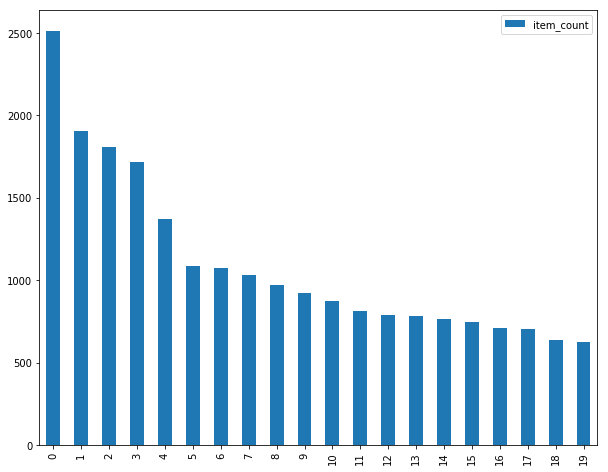

In [131]:
import matplotlib.pyplot as plt
item_summary_df[['item_count']].head(n=20).plot.bar()
plt.show()

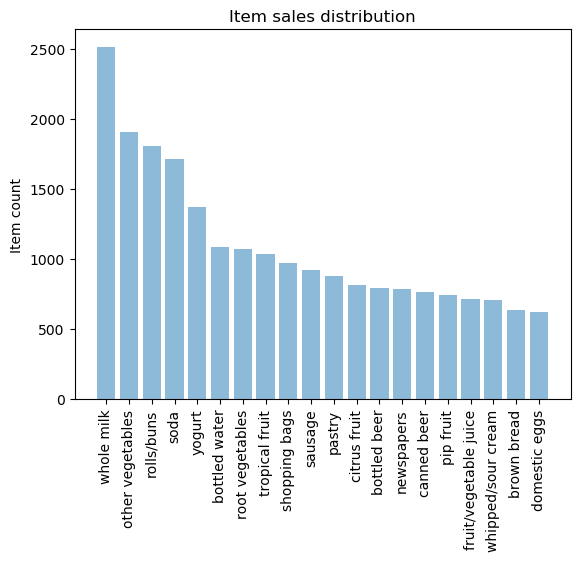

In [132]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = (list(item_summary_df['item_name'].head(n=20)))
y_pos = np.arange(len(objects))
performance = list(item_summary_df['item_count'].head(n=20))
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Item sales distribution')
 
plt.show()

In [134]:
import Orange
data = Orange.data.Table(r"C:\Users\DELL\Anaconda3\pkgs\orange3-3.23.0-py37h6538335_1\Lib\site-packages\Orange\tests\datasets\lenses.tab")

In [135]:
data.X

array([[2., 1., 0., 1.],
       [2., 1., 0., 0.],
       [2., 1., 1., 1.],
       [2., 1., 1., 0.],
       [2., 0., 0., 1.],
       [2., 0., 0., 0.],
       [2., 0., 1., 1.],
       [2., 0., 1., 0.],
       [0., 1., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 1., 1.],
       [0., 1., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 0.],
       [1., 1., 0., 1.],
       [1., 1., 0., 0.],
       [1., 1., 1., 1.],
       [1., 1., 1., 0.],
       [1., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 1., 1.],
       [1., 0., 1., 0.]])

In [136]:
#input_df = grocery_df
def prune_dataset(input_df, length_trans = 2, total_sales_perc = 0.5, start_item = None, end_item = None):
    if 'total_items' in input_df.columns:
        del(input_df['total_items'])
    item_count = input_df.sum().sort_values(ascending = False).reset_index()
    total_items = sum(input_df.sum().sort_values(ascending = False))
    item_count.rename(columns={item_count.columns[0]:'item_name',item_count.columns[1]:'item_count'}, inplace=True)
    if not start_item and not end_item: 
        item_count['item_perc'] = item_count['item_count']/total_items
        item_count['total_perc'] = item_count.item_perc.cumsum()
        selected_items = list(item_count[item_count.total_perc < total_sales_perc].item_name)
        input_df['total_items'] = input_df[selected_items].sum(axis = 1)
        input_df = input_df[input_df.total_items >= length_trans]
        del(input_df['total_items'])
        return input_df[selected_items], item_count[item_count.total_perc < total_sales_perc]
    elif end_item > start_item:
        selected_items = list(item_count[start_item:end_item].item_name)
        input_df['total_items'] = input_df[selected_items].sum(axis = 1)
        input_df = input_df[input_df.total_items >= length_trans]
        del(input_df['total_items'])
        return input_df[selected_items],item_count[start_item:end_item]

In [137]:
output_df, item_counts = prune_dataset(input_df=grocery_df, length_trans=2,total_sales_perc=0.4)
print(output_df.shape)

(4585, 13)


In [138]:
output_df_n, item_counts_n = prune_dataset(grocery_df, length_trans = 2,start_item = 5, end_item = 12)
print(output_df_n.shape)

(1607, 7)


In [139]:
input_ass_rules = output_df
from Orange.data import Domain, DiscreteVariable, ContinuousVariable
from orangecontrib.associate.fpgrowth import *
domain_grocery = Domain([DiscreteVariable.make(name=item,values=['0', '1']) for item in input_ass_rules.columns])
data_gro_1 = Orange.data.Table.from_numpy(domain=domain_grocery,  X=input_ass_rules.as_matrix(),Y= None)
data_gro_1_en, mapping = OneHot.encode(data_gro_1, include_class=False)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [140]:
mapping

{0: (0, 0),
 1: (0, 1),
 2: (1, 0),
 3: (1, 1),
 4: (2, 0),
 5: (2, 1),
 6: (3, 0),
 7: (3, 1),
 8: (4, 0),
 9: (4, 1),
 10: (5, 0),
 11: (5, 1),
 12: (6, 0),
 13: (6, 1),
 14: (7, 0),
 15: (7, 1),
 16: (8, 0),
 17: (8, 1),
 18: (9, 0),
 19: (9, 1),
 20: (10, 0),
 21: (10, 1),
 22: (11, 0),
 23: (11, 1),
 24: (12, 0),
 25: (12, 1)}

In [141]:
support = 0.01
print("num of required transactions = ", int(input_ass_rules.shape[0]*support))
num_trans = input_ass_rules.shape[0]*support
itemsets = dict(frequent_itemsets(data_gro_1_en, support))

num of required transactions =  45


In [142]:
len(itemsets)

166886

In [143]:
confidence = 0.3
rules_df = pd.DataFrame()
if len(itemsets) < 1000000: 
    rules = [(P, Q, supp, conf)
    for P, Q, supp, conf in association_rules(itemsets, confidence)
       if len(Q) == 1 ]

    names = {item: '{}={}'.format(var.name, val)
        for item, var, val in OneHot.decode(mapping, data_gro_1, mapping)}
    
    eligible_ante = [v for k,v in names.items() if v.endswith("1")]
    
    N = input_ass_rules.shape[0]
    
    rule_stats = list(rules_stats(rules, itemsets, N))
    
    rule_list_df = []
    for ex_rule_frm_rule_stat in rule_stats:
        ante = ex_rule_frm_rule_stat[0]            
        cons = ex_rule_frm_rule_stat[1]
        named_cons = names[next(iter(cons))]
        if named_cons in eligible_ante:
            rule_lhs = [names[i][:-2] for i in ante if names[i] in eligible_ante]
            ante_rule = ', '.join(rule_lhs)
            if ante_rule and len(rule_lhs)>1 :
                rule_dict = {'support' : ex_rule_frm_rule_stat[2],
                     'confidence' : ex_rule_frm_rule_stat[3],
                    'coverage' : ex_rule_frm_rule_stat[4],
                     'strength' : ex_rule_frm_rule_stat[5],
                     'lift' : ex_rule_frm_rule_stat[6],
                    'leverage' : ex_rule_frm_rule_stat[7],
                    'antecedent': ante_rule,
                    'consequent':named_cons[:-2] }
                rule_list_df.append(rule_dict)
    rules_df = pd.DataFrame(rule_list_df)
    print("Raw rules data frame of {} rules generated".format(rules_df.shape[0]))
    if not rules_df.empty:
        pruned_rules_df = rules_df.groupby(['antecedent','consequent']).max().reset_index()
    else:
        print("Unable to generate any rule")

Raw rules data frame of 16628 rules generated


In [144]:
pruned_rules_df[['antecedent','consequent','support','confidence','lift']].groupby('consequent').max().reset_index().sort_values('lift',ascending=False)

,consequent,antecedent,support,confidence,lift
4,root vegetables,"yogurt, whole milk, tropical fruit",228,0.463636,2.230611
5,sausage,"shopping bags, rolls/buns",59,0.393162,2.201037
8,tropical fruit,"yogurt, root vegetables, whole milk",92,0.429907,2.156588
1,citrus fruit,"whole milk, other vegetables, tropical fruit",66,0.333333,2.125637
10,yogurt,"whole milk, tropical fruit",199,0.484211,1.891061
2,other vegetables,"yogurt, whole milk, tropical fruit",228,0.643836,1.826724
6,shopping bags,"soda, sausage",50,0.304878,1.782992
0,bottled water,"yogurt, soda",59,0.333333,1.707635
9,whole milk,"yogurt, tropical fruit",228,0.754098,1.703222
3,rolls/buns,"yogurt, whole milk, tropical fruit",97,0.522222,1.679095


In [145]:
old_rules_df = pruned_rules_df[['antecedent','consequent','support','confidence','lift']].sort_values(['lift', 'support','confidence'], ascending=False)

In [150]:
visited_rules = set()
for ante, cons, supp, conf in rules:
    if names[next(iter(cons))] == eligible_ante[0]:
        rule_lhs = [names[i][:-2] for i in ante if names[i] in eligible_ante]
        ante_rule = ', '.join(rule_lhs)
        if ante_rule and len(rule_lhs)>1 and ante_rule not in visited_rules:
            print(ante_rule, '-->',
              names[next(iter(cons))][:-2],
              '(supp: {}, conf: {})'.format(supp, conf))
        # By sales percentage

total_sales_perc = 0.5
item_count = grocery_df.sum().sort_values(ascending = False).reset_index()
total_items = sum(grocery_df.sum().sort_values(ascending = False))
item_count.rename(columns={item_count.columns[0]:'item_name',item_count.columns[1]:'item_count'}, inplace=True)
item_count['item_perc'] = item_count['item_count']/total_items
item_count['total_perc'] = item_count.item_perc.cumsum()
selected_items = list(item_count[item_count.total_perc < total_sales_perc].item_name)
print(len(selected_items))
selected_items
visited_rules.add(ante_rule)

other vegetables, rolls/buns --> whole milk (supp: 52, conf: 0.4369747899159664)
other vegetables, yogurt --> whole milk (supp: 48, conf: 0.4444444444444444)
other vegetables, yogurt --> whole milk (supp: 46, conf: 0.44660194174757284)
other vegetables, yogurt --> whole milk (supp: 50, conf: 0.44642857142857145)
other vegetables, yogurt --> whole milk (supp: 48, conf: 0.45714285714285713)
other vegetables, yogurt --> whole milk (supp: 53, conf: 0.4690265486725664)
other vegetables, root vegetables --> whole milk (supp: 48, conf: 0.43636363636363634)
other vegetables, root vegetables --> whole milk (supp: 46, conf: 0.42201834862385323)
other vegetables, root vegetables --> whole milk (supp: 50, conf: 0.4672897196261682)
other vegetables, root vegetables --> whole milk (supp: 50, conf: 0.4424778761061947)
other vegetables, root vegetables --> whole milk (supp: 47, conf: 0.4519230769230769)
other vegetables, root vegetables --> whole milk (supp: 51, conf: 0.4358974358974359)
other vegetab

other vegetables, rolls/buns --> whole milk (supp: 46, conf: 0.3770491803278688)
other vegetables, rolls/buns --> whole milk (supp: 53, conf: 0.3897058823529412)
other vegetables, rolls/buns --> whole milk (supp: 54, conf: 0.4122137404580153)
other vegetables, rolls/buns --> whole milk (supp: 47, conf: 0.373015873015873)
other vegetables, rolls/buns --> whole milk (supp: 46, conf: 0.4)
other vegetables, rolls/buns --> whole milk (supp: 55, conf: 0.39285714285714285)
other vegetables, rolls/buns --> whole milk (supp: 47, conf: 0.3790322580645161)
other vegetables, rolls/buns --> whole milk (supp: 53, conf: 0.41732283464566927)
other vegetables, rolls/buns --> whole milk (supp: 49, conf: 0.3769230769230769)
other vegetables, rolls/buns --> whole milk (supp: 51, conf: 0.3893129770992366)
other vegetables, rolls/buns --> whole milk (supp: 50, conf: 0.4065040650406504)
other vegetables, rolls/buns --> whole milk (supp: 47, conf: 0.3790322580645161)
other vegetables, rolls/buns --> whole mil

other vegetables, yogurt --> whole milk (supp: 52, conf: 0.46846846846846846)
other vegetables, yogurt --> whole milk (supp: 48, conf: 0.44036697247706424)
other vegetables, yogurt --> whole milk (supp: 59, conf: 0.4573643410852713)
other vegetables, yogurt --> whole milk (supp: 56, conf: 0.45901639344262296)
other vegetables, yogurt --> whole milk (supp: 54, conf: 0.46153846153846156)
other vegetables, yogurt --> whole milk (supp: 52, conf: 0.46017699115044247)
other vegetables, yogurt --> whole milk (supp: 60, conf: 0.48)
other vegetables, yogurt --> whole milk (supp: 48, conf: 0.44036697247706424)
other vegetables, yogurt --> whole milk (supp: 62, conf: 0.4732824427480916)
other vegetables, yogurt --> whole milk (supp: 59, conf: 0.46825396825396826)
other vegetables, yogurt --> whole milk (supp: 55, conf: 0.4700854700854701)
other vegetables, yogurt --> whole milk (supp: 52, conf: 0.45217391304347826)
other vegetables, yogurt --> whole milk (supp: 58, conf: 0.47540983606557374)
othe

other vegetables, root vegetables --> whole milk (supp: 74, conf: 0.44047619047619047)
other vegetables, root vegetables --> whole milk (supp: 66, conf: 0.44594594594594594)
other vegetables, root vegetables --> whole milk (supp: 60, conf: 0.4316546762589928)
other vegetables, root vegetables --> whole milk (supp: 69, conf: 0.43125)
other vegetables, root vegetables --> whole milk (supp: 61, conf: 0.4326241134751773)
other vegetables, root vegetables --> whole milk (supp: 63, conf: 0.4090909090909091)
other vegetables, root vegetables --> whole milk (supp: 67, conf: 0.44966442953020136)
other vegetables, root vegetables --> whole milk (supp: 63, conf: 0.45652173913043476)
other vegetables, root vegetables --> whole milk (supp: 68, conf: 0.4503311258278146)
other vegetables, root vegetables --> whole milk (supp: 67, conf: 0.4407894736842105)
other vegetables, root vegetables --> whole milk (supp: 76, conf: 0.4444444444444444)
other vegetables, root vegetables --> whole milk (supp: 70, c

other vegetables, citrus fruit --> whole milk (supp: 46, conf: 0.38333333333333336)
other vegetables, citrus fruit --> whole milk (supp: 46, conf: 0.3709677419354839)
other vegetables, citrus fruit --> whole milk (supp: 57, conf: 0.4222222222222222)
other vegetables, citrus fruit --> whole milk (supp: 49, conf: 0.3888888888888889)
other vegetables, citrus fruit --> whole milk (supp: 52, conf: 0.37681159420289856)
other vegetables, rolls/buns --> whole milk (supp: 51, conf: 0.3617021276595745)
other vegetables, rolls/buns --> whole milk (supp: 52, conf: 0.3880597014925373)
other vegetables, rolls/buns --> whole milk (supp: 62, conf: 0.389937106918239)
other vegetables, rolls/buns --> whole milk (supp: 52, conf: 0.36619718309859156)
other vegetables, rolls/buns --> whole milk (supp: 61, conf: 0.4066666666666667)
other vegetables, rolls/buns --> whole milk (supp: 56, conf: 0.37333333333333335)
other vegetables, rolls/buns --> whole milk (supp: 47, conf: 0.3700787401574803)
other vegetable

other vegetables, soda --> whole milk (supp: 46, conf: 0.41818181818181815)
other vegetables, soda --> whole milk (supp: 49, conf: 0.4152542372881356)
other vegetables, soda --> whole milk (supp: 47, conf: 0.4017094017094017)
other vegetables, soda --> whole milk (supp: 49, conf: 0.4152542372881356)
other vegetables, soda --> whole milk (supp: 46, conf: 0.4)
other vegetables, soda --> whole milk (supp: 47, conf: 0.3821138211382114)
other vegetables, soda --> whole milk (supp: 47, conf: 0.4051724137931034)
other vegetables, soda --> whole milk (supp: 49, conf: 0.4117647058823529)
other vegetables, soda --> whole milk (supp: 47, conf: 0.3884297520661157)
other vegetables, soda --> whole milk (supp: 48, conf: 0.41379310344827586)
other vegetables, soda --> whole milk (supp: 50, conf: 0.4065040650406504)
other vegetables, soda --> whole milk (supp: 50, conf: 0.3968253968253968)
other vegetables, soda --> whole milk (supp: 46, conf: 0.42201834862385323)
other vegetables, soda --> whole milk

other vegetables, yogurt --> whole milk (supp: 77, conf: 0.4556213017751479)
other vegetables, yogurt --> whole milk (supp: 59, conf: 0.4338235294117647)
other vegetables, yogurt --> whole milk (supp: 59, conf: 0.42142857142857143)
other vegetables, yogurt --> whole milk (supp: 65, conf: 0.4482758620689655)
other vegetables, yogurt --> whole milk (supp: 81, conf: 0.47368421052631576)
other vegetables, yogurt --> whole milk (supp: 79, conf: 0.46745562130177515)
other vegetables, yogurt --> whole milk (supp: 95, conf: 0.4947916666666667)
other vegetables, yogurt --> whole milk (supp: 70, conf: 0.45751633986928103)
other vegetables, yogurt --> whole milk (supp: 75, conf: 0.4601226993865031)
other vegetables, yogurt --> whole milk (supp: 78, conf: 0.4727272727272727)
other vegetables, yogurt --> whole milk (supp: 72, conf: 0.4675324675324675)
other vegetables, yogurt --> whole milk (supp: 76, conf: 0.4523809523809524)
other vegetables, yogurt --> whole milk (supp: 83, conf: 0.4611111111111

other vegetables, root vegetables --> whole milk (supp: 89, conf: 0.4472361809045226)
other vegetables, root vegetables --> whole milk (supp: 74, conf: 0.42528735632183906)
other vegetables, root vegetables --> whole milk (supp: 79, conf: 0.40512820512820513)
other vegetables, root vegetables --> whole milk (supp: 72, conf: 0.4260355029585799)
other vegetables, root vegetables --> whole milk (supp: 65, conf: 0.41935483870967744)
other vegetables, root vegetables --> whole milk (supp: 73, conf: 0.4124293785310734)
other vegetables, root vegetables --> whole milk (supp: 78, conf: 0.4406779661016949)
other vegetables, root vegetables --> whole milk (supp: 84, conf: 0.42)
other vegetables, root vegetables --> whole milk (supp: 75, conf: 0.423728813559322)
other vegetables, root vegetables --> whole milk (supp: 78, conf: 0.41711229946524064)
other vegetables, root vegetables --> whole milk (supp: 89, conf: 0.41784037558685444)
other vegetables, root vegetables --> whole milk (supp: 80, conf

other vegetables, tropical fruit --> whole milk (supp: 59, conf: 0.4645669291338583)
other vegetables, tropical fruit --> whole milk (supp: 55, conf: 0.4263565891472868)
other vegetables, tropical fruit --> whole milk (supp: 61, conf: 0.46564885496183206)
other vegetables, tropical fruit --> whole milk (supp: 48, conf: 0.41739130434782606)
other vegetables, tropical fruit --> whole milk (supp: 52, conf: 0.45614035087719296)
other vegetables, tropical fruit --> whole milk (supp: 52, conf: 0.4297520661157025)
other vegetables, tropical fruit --> whole milk (supp: 53, conf: 0.4274193548387097)
other vegetables, tropical fruit --> whole milk (supp: 54, conf: 0.4153846153846154)
other vegetables, tropical fruit --> whole milk (supp: 55, conf: 0.4263565891472868)
other vegetables, tropical fruit --> whole milk (supp: 47, conf: 0.415929203539823)
other vegetables, tropical fruit --> whole milk (supp: 48, conf: 0.4485981308411215)
other vegetables, tropical fruit --> whole milk (supp: 51, conf

other vegetables, citrus fruit --> whole milk (supp: 50, conf: 0.373134328358209)
other vegetables, citrus fruit --> whole milk (supp: 48, conf: 0.34782608695652173)
other vegetables, citrus fruit --> whole milk (supp: 60, conf: 0.4166666666666667)
other vegetables, citrus fruit --> whole milk (supp: 46, conf: 0.3511450381679389)
other vegetables, citrus fruit --> whole milk (supp: 52, conf: 0.3851851851851852)
other vegetables, citrus fruit --> whole milk (supp: 57, conf: 0.37748344370860926)
other vegetables, citrus fruit --> whole milk (supp: 49, conf: 0.34507042253521125)
other vegetables, citrus fruit --> whole milk (supp: 61, conf: 0.4178082191780822)
other vegetables, citrus fruit --> whole milk (supp: 51, conf: 0.3805970149253731)
other vegetables, citrus fruit --> whole milk (supp: 55, conf: 0.40145985401459855)
other vegetables, citrus fruit --> whole milk (supp: 59, conf: 0.3933333333333333)
other vegetables, citrus fruit --> whole milk (supp: 46, conf: 0.36220472440944884)


other vegetables, rolls/buns --> whole milk (supp: 92, conf: 0.39316239316239315)
other vegetables, rolls/buns --> whole milk (supp: 86, conf: 0.4236453201970443)
other vegetables, rolls/buns --> whole milk (supp: 72, conf: 0.38095238095238093)
other vegetables, rolls/buns --> whole milk (supp: 99, conf: 0.4439461883408072)
other vegetables, rolls/buns --> whole milk (supp: 75, conf: 0.4032258064516129)
other vegetables, rolls/buns --> whole milk (supp: 92, conf: 0.41818181818181815)
other vegetables, rolls/buns --> whole milk (supp: 99, conf: 0.43043478260869567)
other vegetables, rolls/buns --> whole milk (supp: 86, conf: 0.40186915887850466)
other vegetables, rolls/buns --> whole milk (supp: 76, conf: 0.3671497584541063)
other vegetables, rolls/buns --> whole milk (supp: 98, conf: 0.41702127659574467)
other vegetables, rolls/buns --> whole milk (supp: 74, conf: 0.3681592039800995)
other vegetables, rolls/buns --> whole milk (supp: 89, conf: 0.38362068965517243)
other vegetables, rol

other vegetables, yogurt --> whole milk (supp: 70, conf: 0.4430379746835443)
other vegetables, yogurt --> whole milk (supp: 70, conf: 0.44871794871794873)
other vegetables, yogurt --> whole milk (supp: 79, conf: 0.47305389221556887)
other vegetables, yogurt --> whole milk (supp: 71, conf: 0.44375)
other vegetables, yogurt --> whole milk (supp: 77, conf: 0.46107784431137727)
other vegetables, yogurt --> whole milk (supp: 85, conf: 0.4722222222222222)
other vegetables, yogurt --> whole milk (supp: 66, conf: 0.4429530201342282)
other vegetables, yogurt --> whole milk (supp: 67, conf: 0.4407894736842105)
other vegetables, yogurt --> whole milk (supp: 75, conf: 0.4716981132075472)
other vegetables, yogurt --> whole milk (supp: 92, conf: 0.4919786096256685)
other vegetables, yogurt --> whole milk (supp: 90, conf: 0.4838709677419355)
other vegetables, yogurt --> whole milk (supp: 107, conf: 0.5119617224880383)
other vegetables, yogurt --> whole milk (supp: 80, conf: 0.47058823529411764)
other

other vegetables, root vegetables --> whole milk (supp: 86, conf: 0.450261780104712)
other vegetables, root vegetables --> whole milk (supp: 98, conf: 0.4558139534883721)
other vegetables, root vegetables --> whole milk (supp: 91, conf: 0.4504950495049505)
other vegetables, root vegetables --> whole milk (supp: 100, conf: 0.45871559633027525)
other vegetables, root vegetables --> whole milk (supp: 89, conf: 0.445)
other vegetables, root vegetables --> whole milk (supp: 101, conf: 0.44493392070484583)
other vegetables, root vegetables --> whole milk (supp: 87, conf: 0.43283582089552236)
other vegetables, root vegetables --> whole milk (supp: 90, conf: 0.41284403669724773)
other vegetables, root vegetables --> whole milk (supp: 85, conf: 0.4358974358974359)
other vegetables, root vegetables --> whole milk (supp: 82, conf: 0.44324324324324327)
other vegetables, root vegetables --> whole milk (supp: 88, conf: 0.43137254901960786)
other vegetables, root vegetables --> whole milk (supp: 90, 

yogurt, root vegetables --> whole milk (supp: 47, conf: 0.5529411764705883)
yogurt, root vegetables --> whole milk (supp: 46, conf: 0.5411764705882353)
yogurt, root vegetables --> whole milk (supp: 46, conf: 0.5411764705882353)
yogurt, root vegetables --> whole milk (supp: 49, conf: 0.5444444444444444)
yogurt, root vegetables --> whole milk (supp: 50, conf: 0.5319148936170213)
yogurt, root vegetables --> whole milk (supp: 47, conf: 0.5465116279069767)
yogurt, root vegetables --> whole milk (supp: 48, conf: 0.5274725274725275)
yogurt, root vegetables --> whole milk (supp: 52, conf: 0.5360824742268041)
yogurt, root vegetables --> whole milk (supp: 46, conf: 0.5679012345679012)
yogurt, root vegetables --> whole milk (supp: 48, conf: 0.5517241379310345)
yogurt, root vegetables --> whole milk (supp: 50, conf: 0.5555555555555556)
yogurt, root vegetables --> whole milk (supp: 47, conf: 0.5529411764705883)
rolls/buns, root vegetables --> whole milk (supp: 46, conf: 0.45098039215686275)
rolls/b

yogurt, tropical fruit --> whole milk (supp: 77, conf: 0.5238095238095238)
yogurt, tropical fruit --> whole milk (supp: 54, conf: 0.43548387096774194)
yogurt, tropical fruit --> whole milk (supp: 58, conf: 0.4496124031007752)
yogurt, tropical fruit --> whole milk (supp: 59, conf: 0.44360902255639095)
yogurt, tropical fruit --> whole milk (supp: 58, conf: 0.4715447154471545)
yogurt, tropical fruit --> whole milk (supp: 56, conf: 0.45901639344262296)
yogurt, tropical fruit --> whole milk (supp: 64, conf: 0.46715328467153283)
yogurt, tropical fruit --> whole milk (supp: 51, conf: 0.4358974358974359)
yogurt, tropical fruit --> whole milk (supp: 54, conf: 0.43902439024390244)
yogurt, tropical fruit --> whole milk (supp: 58, conf: 0.43609022556390975)
yogurt, tropical fruit --> whole milk (supp: 67, conf: 0.4589041095890411)
yogurt, tropical fruit --> whole milk (supp: 76, conf: 0.4935064935064935)
yogurt, tropical fruit --> whole milk (supp: 73, conf: 0.47096774193548385)
yogurt, tropical f

yogurt, sausage --> whole milk (supp: 48, conf: 0.5)
other vegetables, shopping bags --> whole milk (supp: 47, conf: 0.373015873015873)
other vegetables, shopping bags --> whole milk (supp: 46, conf: 0.36507936507936506)
other vegetables, shopping bags --> whole milk (supp: 46, conf: 0.38333333333333336)
other vegetables, shopping bags --> whole milk (supp: 46, conf: 0.34328358208955223)
other vegetables, shopping bags --> whole milk (supp: 48, conf: 0.366412213740458)
other vegetables, shopping bags --> whole milk (supp: 46, conf: 0.34328358208955223)
other vegetables, shopping bags --> whole milk (supp: 48, conf: 0.35036496350364965)
other vegetables, shopping bags --> whole milk (supp: 53, conf: 0.39552238805970147)
other vegetables, shopping bags --> whole milk (supp: 47, conf: 0.33098591549295775)
other vegetables, pastry --> whole milk (supp: 46, conf: 0.4339622641509434)
other vegetables, pastry --> whole milk (supp: 47, conf: 0.41228070175438597)
other vegetables, pastry --> wh

yogurt, citrus fruit --> whole milk (supp: 54, conf: 0.4954128440366973)
yogurt, citrus fruit --> whole milk (supp: 52, conf: 0.48148148148148145)
yogurt, citrus fruit --> whole milk (supp: 48, conf: 0.47058823529411764)
yogurt, citrus fruit --> whole milk (supp: 51, conf: 0.504950495049505)
yogurt, citrus fruit --> whole milk (supp: 46, conf: 0.46464646464646464)
yogurt, citrus fruit --> whole milk (supp: 52, conf: 0.4727272727272727)
yogurt, citrus fruit --> whole milk (supp: 49, conf: 0.46226415094339623)
yogurt, citrus fruit --> whole milk (supp: 51, conf: 0.5204081632653061)
yogurt, citrus fruit --> whole milk (supp: 46, conf: 0.48936170212765956)
yogurt, citrus fruit --> whole milk (supp: 50, conf: 0.4807692307692308)
yogurt, citrus fruit --> whole milk (supp: 49, conf: 0.4666666666666667)
yogurt, citrus fruit --> whole milk (supp: 46, conf: 0.46464646464646464)
yogurt, citrus fruit --> whole milk (supp: 52, conf: 0.5048543689320388)
yogurt, citrus fruit --> whole milk (supp: 60,

other vegetables, soda --> whole milk (supp: 60, conf: 0.39473684210526316)
other vegetables, soda --> whole milk (supp: 48, conf: 0.35294117647058826)
other vegetables, soda --> whole milk (supp: 54, conf: 0.3724137931034483)
other vegetables, soda --> whole milk (supp: 55, conf: 0.34591194968553457)
other vegetables, soda --> whole milk (supp: 52, conf: 0.3851851851851852)
other vegetables, soda --> whole milk (supp: 64, conf: 0.42953020134228187)
other vegetables, soda --> whole milk (supp: 65, conf: 0.40372670807453415)
other vegetables, soda --> whole milk (supp: 52, conf: 0.38235294117647056)
other vegetables, soda --> whole milk (supp: 53, conf: 0.3581081081081081)
other vegetables, soda --> whole milk (supp: 61, conf: 0.37888198757763975)
other vegetables, soda --> whole milk (supp: 55, conf: 0.3767123287671233)
other vegetables, soda --> whole milk (supp: 67, conf: 0.4267515923566879)
other vegetables, soda --> whole milk (supp: 68, conf: 0.40236686390532544)
other vegetables,

soda, yogurt --> whole milk (supp: 50, conf: 0.3225806451612903)
soda, yogurt --> whole milk (supp: 57, conf: 0.4014084507042254)
soda, yogurt --> whole milk (supp: 55, conf: 0.35714285714285715)
soda, yogurt --> whole milk (supp: 57, conf: 0.3392857142857143)
soda, yogurt --> whole milk (supp: 54, conf: 0.34394904458598724)
soda, yogurt --> whole milk (supp: 47, conf: 0.3219178082191781)
soda, yogurt --> whole milk (supp: 57, conf: 0.41605839416058393)
soda, yogurt --> whole milk (supp: 57, conf: 0.37748344370860926)
soda, yogurt --> whole milk (supp: 59, conf: 0.3575757575757576)
soda, yogurt --> whole milk (supp: 53, conf: 0.363013698630137)
soda, yogurt --> whole milk (supp: 64, conf: 0.3764705882352941)
soda, yogurt --> whole milk (supp: 53, conf: 0.375886524822695)
soda, yogurt --> whole milk (supp: 55, conf: 0.36423841059602646)
soda, yogurt --> whole milk (supp: 55, conf: 0.32934131736526945)
soda, yogurt --> whole milk (supp: 49, conf: 0.32666666666666666)
soda, yogurt --> who

rolls/buns, root vegetables --> whole milk (supp: 53, conf: 0.4732142857142857)
rolls/buns, root vegetables --> whole milk (supp: 58, conf: 0.4715447154471545)
rolls/buns, root vegetables --> whole milk (supp: 76, conf: 0.5205479452054794)
rolls/buns, root vegetables --> whole milk (supp: 60, conf: 0.46511627906976744)
rolls/buns, root vegetables --> whole milk (supp: 67, conf: 0.49264705882352944)
rolls/buns, root vegetables --> whole milk (supp: 60, conf: 0.47244094488188976)
rolls/buns, root vegetables --> whole milk (supp: 71, conf: 0.4930555555555556)
rolls/buns, root vegetables --> whole milk (supp: 52, conf: 0.4642857142857143)
rolls/buns, root vegetables --> whole milk (supp: 67, conf: 0.5193798449612403)
rolls/buns, root vegetables --> whole milk (supp: 56, conf: 0.4827586206896552)
rolls/buns, root vegetables --> whole milk (supp: 59, conf: 0.5130434782608696)
rolls/buns, root vegetables --> whole milk (supp: 54, conf: 0.4954128440366973)
rolls/buns, root vegetables --> whole

rolls/buns, tropical fruit --> whole milk (supp: 52, conf: 0.4482758620689655)
rolls/buns, tropical fruit --> whole milk (supp: 46, conf: 0.4107142857142857)
rolls/buns, tropical fruit --> whole milk (supp: 59, conf: 0.4573643410852713)
rolls/buns, tropical fruit --> whole milk (supp: 47, conf: 0.3821138211382114)
rolls/buns, tropical fruit --> whole milk (supp: 53, conf: 0.424)
rolls/buns, tropical fruit --> whole milk (supp: 51, conf: 0.408)
rolls/buns, tropical fruit --> whole milk (supp: 49, conf: 0.4083333333333333)
rolls/buns, tropical fruit --> whole milk (supp: 49, conf: 0.3888888888888889)
rolls/buns, tropical fruit --> whole milk (supp: 50, conf: 0.4)
rolls/buns, tropical fruit --> whole milk (supp: 51, conf: 0.4015748031496063)
rolls/buns, tropical fruit --> whole milk (supp: 66, conf: 0.46153846153846156)
rolls/buns, tropical fruit --> whole milk (supp: 47, conf: 0.38524590163934425)
rolls/buns, tropical fruit --> whole milk (supp: 57, conf: 0.40714285714285714)
rolls/buns,

soda, bottled water --> whole milk (supp: 49, conf: 0.3006134969325153)
bottled water, tropical fruit --> whole milk (supp: 51, conf: 0.504950495049505)
bottled water, tropical fruit --> whole milk (supp: 54, conf: 0.5192307692307693)
bottled water, tropical fruit --> whole milk (supp: 51, conf: 0.5)
bottled water, tropical fruit --> whole milk (supp: 56, conf: 0.448)
bottled water, tropical fruit --> whole milk (supp: 47, conf: 0.42342342342342343)
bottled water, tropical fruit --> whole milk (supp: 53, conf: 0.5047619047619047)
bottled water, tropical fruit --> whole milk (supp: 49, conf: 0.494949494949495)
bottled water, tropical fruit --> whole milk (supp: 54, conf: 0.4576271186440678)
bottled water, tropical fruit --> whole milk (supp: 53, conf: 0.5096153846153846)
bottled water, tropical fruit --> whole milk (supp: 60, conf: 0.4838709677419355)
bottled water, tropical fruit --> whole milk (supp: 57, conf: 0.4634146341463415)
bottled water, tropical fruit --> whole milk (supp: 46,

soda, pastry --> whole milk (supp: 48, conf: 0.366412213740458)
soda, pastry --> whole milk (supp: 47, conf: 0.38524590163934425)
soda, pastry --> whole milk (supp: 48, conf: 0.3310344827586207)
soda, pastry --> whole milk (supp: 47, conf: 0.3560606060606061)
soda, pastry --> whole milk (supp: 48, conf: 0.366412213740458)
soda, pastry --> whole milk (supp: 48, conf: 0.37209302325581395)
soda, pastry --> whole milk (supp: 46, conf: 0.30666666666666664)
soda, pastry --> whole milk (supp: 46, conf: 0.40707964601769914)
soda, pastry --> whole milk (supp: 49, conf: 0.362962962962963)
soda, pastry --> whole milk (supp: 46, conf: 0.3458646616541353)
soda, pastry --> whole milk (supp: 48, conf: 0.366412213740458)
soda, pastry --> whole milk (supp: 48, conf: 0.3870967741935484)
soda, pastry --> whole milk (supp: 48, conf: 0.3333333333333333)
soda, pastry --> whole milk (supp: 48, conf: 0.32653061224489793)
soda, pastry --> whole milk (supp: 46, conf: 0.323943661971831)
soda, pastry --> whole mi

other vegetables, rolls/buns --> whole milk (supp: 118, conf: 0.41403508771929826)
other vegetables, rolls/buns --> whole milk (supp: 95, conf: 0.36964980544747084)
other vegetables, rolls/buns --> whole milk (supp: 123, conf: 0.42857142857142855)
other vegetables, rolls/buns --> whole milk (supp: 106, conf: 0.3940520446096654)
other vegetables, rolls/buns --> whole milk (supp: 136, conf: 0.4444444444444444)
other vegetables, rolls/buns --> whole milk (supp: 104, conf: 0.4015444015444015)
other vegetables, rolls/buns --> whole milk (supp: 121, conf: 0.4033333333333333)
other vegetables, rolls/buns --> whole milk (supp: 112, conf: 0.42748091603053434)
other vegetables, rolls/buns --> whole milk (supp: 96, conf: 0.3983402489626556)
other vegetables, rolls/buns --> whole milk (supp: 128, conf: 0.45390070921985815)
other vegetables, rolls/buns --> whole milk (supp: 95, conf: 0.40425531914893614)
other vegetables, rolls/buns --> whole milk (supp: 115, conf: 0.42435424354243545)
other vegeta

root vegetables, other vegetables, rolls/buns --> whole milk (supp: 54, conf: 0.5)
root vegetables, rolls/buns --> whole milk (supp: 93, conf: 0.5314285714285715)
root vegetables, rolls/buns --> whole milk (supp: 74, conf: 0.4774193548387097)
root vegetables, rolls/buns --> whole milk (supp: 94, conf: 0.5136612021857924)
root vegetables, rolls/buns --> whole milk (supp: 82, conf: 0.48520710059171596)
root vegetables, other vegetables, rolls/buns --> whole milk (supp: 51, conf: 0.5257731958762887)
root vegetables, rolls/buns --> whole milk (supp: 81, conf: 0.5294117647058824)
root vegetables, rolls/buns --> whole milk (supp: 66, conf: 0.48175182481751827)
root vegetables, rolls/buns --> whole milk (supp: 82, conf: 0.5157232704402516)
root vegetables, rolls/buns --> whole milk (supp: 73, conf: 0.5140845070422535)
root vegetables, rolls/buns --> whole milk (supp: 92, conf: 0.5348837209302325)
root vegetables, other vegetables, rolls/buns --> whole milk (supp: 50, conf: 0.49504950495049505

bottled water, rolls/buns --> whole milk (supp: 61, conf: 0.3935483870967742)
bottled water, rolls/buns --> whole milk (supp: 51, conf: 0.3422818791946309)
bottled water, rolls/buns --> whole milk (supp: 55, conf: 0.3142857142857143)
bottled water, rolls/buns --> whole milk (supp: 70, conf: 0.3804347826086957)
bottled water, rolls/buns --> whole milk (supp: 62, conf: 0.3563218390804598)
bottled water, rolls/buns --> whole milk (supp: 51, conf: 0.35172413793103446)
bottled water, rolls/buns --> whole milk (supp: 59, conf: 0.4013605442176871)
bottled water, rolls/buns --> whole milk (supp: 50, conf: 0.3333333333333333)
bottled water, rolls/buns --> whole milk (supp: 52, conf: 0.3058823529411765)
bottled water, rolls/buns --> whole milk (supp: 48, conf: 0.3)
bottled water, rolls/buns --> whole milk (supp: 66, conf: 0.36666666666666664)
bottled water, rolls/buns --> whole milk (supp: 64, conf: 0.367816091954023)
bottled water, rolls/buns --> whole milk (supp: 62, conf: 0.3463687150837989)


other vegetables, citrus fruit --> whole milk (supp: 67, conf: 0.3701657458563536)
other vegetables, citrus fruit --> whole milk (supp: 81, conf: 0.405)
other vegetables, citrus fruit --> whole milk (supp: 58, conf: 0.3741935483870968)
other vegetables, citrus fruit --> whole milk (supp: 64, conf: 0.3902439024390244)
other vegetables, citrus fruit --> whole milk (supp: 98, conf: 0.4537037037037037)
other vegetables, citrus fruit --> whole milk (supp: 87, conf: 0.42857142857142855)
other vegetables, citrus fruit --> whole milk (supp: 93, conf: 0.4246575342465753)
other vegetables, citrus fruit --> whole milk (supp: 72, conf: 0.3829787234042553)
other vegetables, citrus fruit --> whole milk (supp: 84, conf: 0.4077669902912621)
other vegetables, citrus fruit --> whole milk (supp: 62, conf: 0.37575757575757573)
other vegetables, citrus fruit --> whole milk (supp: 68, conf: 0.38636363636363635)
other vegetables, citrus fruit --> whole milk (supp: 103, conf: 0.45982142857142855)
other vegeta

other vegetables, soda --> whole milk (supp: 114, conf: 0.42379182156133827)
other vegetables, soda --> whole milk (supp: 111, conf: 0.44223107569721115)
other vegetables, soda --> whole milk (supp: 109, conf: 0.40671641791044777)
other vegetables, soda --> whole milk (supp: 116, conf: 0.4128113879003559)
other vegetables, soda --> whole milk (supp: 121, conf: 0.42907801418439717)
yogurt, other vegetables --> whole milk (supp: 160, conf: 0.5095541401273885)
yogurt, other vegetables --> whole milk (supp: 176, conf: 0.5101449275362319)
yogurt, other vegetables --> whole milk (supp: 180, conf: 0.5187319884726225)
yogurt, other vegetables --> whole milk (supp: 142, conf: 0.47333333333333333)
yogurt, other vegetables --> whole milk (supp: 144, conf: 0.47058823529411764)
yogurt, other vegetables --> whole milk (supp: 199, conf: 0.5320855614973262)
yogurt, other vegetables --> whole milk (supp: 182, conf: 0.5244956772334294)
yogurt, other vegetables --> whole milk (supp: 179, conf: 0.49447513

bottled beer, other vegetables --> whole milk (supp: 66, conf: 0.4888888888888889)
bottled beer, other vegetables --> whole milk (supp: 70, conf: 0.47297297297297297)
bottled beer, other vegetables --> whole milk (supp: 58, conf: 0.43283582089552236)
bottled beer, bottled water --> whole milk (supp: 49, conf: 0.4666666666666667)
bottled beer, bottled water --> whole milk (supp: 49, conf: 0.3769230769230769)
bottled beer, bottled water --> whole milk (supp: 52, conf: 0.40310077519379844)
bottled beer, bottled water --> whole milk (supp: 57, conf: 0.3931034482758621)
bottled beer, bottled water --> whole milk (supp: 55, conf: 0.39285714285714285)
bottled beer, bottled water --> whole milk (supp: 53, conf: 0.363013698630137)
bottled beer, rolls/buns --> whole milk (supp: 52, conf: 0.4094488188976378)
bottled beer, rolls/buns --> whole milk (supp: 46, conf: 0.40350877192982454)
bottled beer, rolls/buns --> whole milk (supp: 48, conf: 0.3870967741935484)
bottled beer, yogurt --> whole milk 

In [151]:
item_counts_n

,item_name,item_count
5,bottled water,1087
6,root vegetables,1072
7,tropical fruit,1032
8,shopping bags,969
9,sausage,924
10,pastry,875
11,citrus fruit,814


In [152]:
items = list(cs_mba_uk.Description.unique())
grouped = cs_mba_uk.groupby('InvoiceNo')
transaction_level_df_uk = grouped.aggregate(lambda x: tuple(x)).reset_index()[['InvoiceNo','Description']]

In [153]:
transaction_dict = {item:0 for item in items}
output_dict = dict()
temp = dict()
for rec in transaction_level_df_uk.to_dict('records'):
    invoice_num = rec['InvoiceNo']
    items_list = rec['Description']
    transaction_dict = {item:0 for item in items}
    transaction_dict.update({item:1 for item in items if item in items_list})
    temp.update({invoice_num:transaction_dict})

new = [v for k,v in temp.items()]
tranasction_df = pd.DataFrame(new)
del(tranasction_df[tranasction_df.columns[0]])

In [154]:
tranasction_df.shape

(18786, 4058)

In [155]:
output_df_uk, item_counts = prune_dataset(input_df=tranasction_df, length_trans=2,total_sales_perc=0.1)
print(output_df_uk.shape)

(8586, 43)


In [156]:
output_df_uk_n, item_counts_n = prune_dataset(input_df=tranasction_df, length_trans = 2,start_item = 0, end_item = 10)
print(output_df_uk_n.shape)

(3711, 10)


In [157]:
item_counts_n

,item_name,item_count
0,WHITE HANGING HEART T-LIGHT HOLDER,2166
1,JUMBO BAG RED RETROSPOT,1938
2,REGENCY CAKESTAND 3 TIER,1685
3,PARTY BUNTING,1594
4,LUNCH BAG RED RETROSPOT,1392
5,ASSORTED COLOUR BIRD ORNAMENT,1371
6,SET OF 3 CAKE TINS PANTRY DESIGN,1241
7,NATURAL SLATE HEART CHALKBOARD,1219
8,LUNCH BAG BLACK SKULL.,1216
9,HEART OF WICKER SMALL,1164


In [158]:
output_df_uk_n.head()

,WHITE HANGING HEART T-LIGHT HOLDER,JUMBO BAG RED RETROSPOT,REGENCY CAKESTAND 3 TIER,PARTY BUNTING,LUNCH BAG RED RETROSPOT,ASSORTED COLOUR BIRD ORNAMENT,SET OF 3 CAKE TINS PANTRY DESIGN,NATURAL SLATE HEART CHALKBOARD,LUNCH BAG BLACK SKULL.,HEART OF WICKER SMALL
16,0,0,0,0,0,0,0,1,0,1
21,1,1,0,0,0,0,0,0,0,0
31,1,0,0,0,1,0,0,0,0,0
33,0,0,0,0,0,0,0,0,1,1
39,0,0,0,0,1,0,0,0,1,0


In [159]:
input_ass_rules = output_df_uk_n

domain_grocery = Domain([DiscreteVariable.make(name=item,values=['0', '1']) for item in input_ass_rules.columns])
data_gro_1 = Orange.data.Table.from_numpy(domain=domain_grocery,  X=input_ass_rules.as_matrix(),Y= None)
data_gro_1_en, mapping = OneHot.encode(data_gro_1, include_class=True)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [160]:
support = 0.009
print("num of required transactions = ", int(input_ass_rules.shape[0]*support))
num_trans = input_ass_rules.shape[0]*support
itemsets = dict(frequent_itemsets(data_gro_1_en, support))

num of required transactions =  33


In [161]:
len(itemsets)

19178

In [162]:
confidence = 0.4
rules_df = pd.DataFrame()
if len(itemsets) < 1000000: 
    rules = [(P, Q, supp, conf)
    for P, Q, supp, conf in association_rules(itemsets, confidence)
       if len(Q) == 1 ]

    names = {item: '{}={}'.format(var.name, val)
        for item, var, val in OneHot.decode(mapping, data_gro_1, mapping)}
    
    eligible_ante = [v for k,v in names.items() if v.endswith("1")]
    
    N = input_ass_rules.shape[0]*0.5
    
    rule_stats = list(rules_stats(rules, itemsets, N))
    
    rule_list_df = []
    for ex_rule_frm_rule_stat in rule_stats:
        ante = ex_rule_frm_rule_stat[0]            
        cons = ex_rule_frm_rule_stat[1]
        named_cons = names[next(iter(cons))]
        if named_cons in eligible_ante:
            rule_lhs = [names[i][:-2] for i in ante if names[i] in eligible_ante]
            ante_rule = ', '.join(rule_lhs)
            if ante_rule and len(rule_lhs)>1 :
                rule_dict = {'support' : ex_rule_frm_rule_stat[2],
                     'confidence' : ex_rule_frm_rule_stat[3],
                    'coverage' : ex_rule_frm_rule_stat[4],
                     'strength' : ex_rule_frm_rule_stat[5],
                     'lift' : ex_rule_frm_rule_stat[6],
                    'leverage' : ex_rule_frm_rule_stat[7],
                    'antecedent': ante_rule,
                    'consequent':named_cons[:-2] }
                rule_list_df.append(rule_dict)
    rules_df = pd.DataFrame(rule_list_df)
    print("Raw rules data frame of {} rules generated".format(rules_df.shape[0]))
    if not rules_df.empty:
        pruned_rules_df = rules_df.groupby(['antecedent','consequent']).max().reset_index()
    else:
        print("Unable to generate any rule")

Raw rules data frame of 2607 rules generated


In [163]:
pruned_rules_df[['antecedent','consequent','support','confidence','lift']].sort_values(['lift','support','confidence'], ascending=False)

,antecedent,consequent,support,confidence,lift
73,"JUMBO BAG RED RETROSPOT, LUNCH BAG RED RETROSP...",NATURAL SLATE HEART CHALKBOARD,37,0.770833,1.583922
58,"HEART OF WICKER SMALL, WHITE HANGING HEART T-L...",NATURAL SLATE HEART CHALKBOARD,36,0.750000,1.541113
103,"JUMBO BAG RED RETROSPOT, WHITE HANGING HEART T...",NATURAL SLATE HEART CHALKBOARD,38,0.745098,1.531040
306,"REGENCY CAKESTAND 3 TIER, PARTY BUNTING, LUNCH...",LUNCH BAG BLACK SKULL.,58,0.789474,1.524317
106,"JUMBO BAG RED RETROSPOT, WHITE HANGING HEART T...",NATURAL SLATE HEART CHALKBOARD,34,0.723404,1.486464
216,"LUNCH BAG RED RETROSPOT, JUMBO BAG RED RETROSP...",HEART OF WICKER SMALL,37,0.649123,1.444181
298,"REGENCY CAKESTAND 3 TIER, LUNCH BAG RED RETROSPOT",LUNCH BAG BLACK SKULL.,75,0.723684,1.397290
362,"WHITE HANGING HEART T-LIGHT HOLDER, JUMBO BAG ...",NATURAL SLATE HEART CHALKBOARD,38,0.678571,1.394340
194,"LUNCH BAG RED RETROSPOT, HEART OF WICKER SMALL...",NATURAL SLATE HEART CHALKBOARD,44,0.656716,1.349432
309,"SET OF 3 CAKE TINS PANTRY DESIGN , HEART OF WI...",NATURAL SLATE HEART CHALKBOARD,39,0.650000,1.335631


In [164]:
pruned_rules_df.to_csv(path_or_buf='pruned_rule_uk_top10_item.csv', index=False)